In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale, robust_scale
import matplotlib.pyplot as plt

In [5]:
fitness = pd.read_csv('./Posco-빅데이터 분석과정 실습 Data/FITNESS.csv', encoding='CP949')

In [64]:
pwd

'/home/pirl/Downloads/ken/Classes'

In [49]:
fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [48]:
fitness.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,31.0,46.838710,5.860016,37.000,43.0000,48.000,51.0000,57.000
WEIGHT,31.0,77.517290,8.368042,59.080,73.2000,77.450,82.6065,91.630
OXY,31.0,47.375806,5.327231,37.388,44.9645,46.774,50.1310,60.055
RUNTIME,31.0,10.586129,1.387414,8.170,9.7800,10.470,11.2700,14.030
RUNPULSE,31.0,169.645161,10.251986,146.000,163.0000,170.000,176.0000,186.000
RSTPULSE,31.0,56.677419,17.822060,40.000,48.0000,53.000,60.5000,144.000
MAXPULSE,31.0,173.774194,9.164095,155.000,168.0000,172.000,180.0000,192.000


In [11]:
fitness['GENDER'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
Name: GENDER, dtype: bool

In [9]:
fitness.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [63]:
fitness["GENDER"].fillna("여성", inplace=True)
fitness.head(15)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [19]:
fitness.groupby("GENDER")['WEIGHT'].agg("mean")

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [20]:
fitness.groupby("GENDER")['WEIGHT'].transform("mean").head()

0    72.908750
1    72.908750
2    72.908750
3    72.908750
4    82.433077
Name: WEIGHT, dtype: float64

In [23]:
fitness["WEIGHT"] = fitness["WEIGHT"].fillna(fitness.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)

In [24]:
fit_char = fitness.select_dtypes(include="object")
fit_numeric = fitness.select_dtypes(exclude='object')

In [30]:
df_scale = scale(fit_numeric)
df_scale = pd.DataFrame(df_scale, columns=fit_numeric.columns)
df_scale.head()

/home/pirl/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.839365,-1.137916,2.327059,-1.770249,-0.361434,-0.951242,-0.196803
1,-1.533241,0.528757,2.419415,-1.433216,0.035184,-0.494940,1.356151
2,-0.665896,1.011023,1.320686,-1.418562,-1.352978,-0.666054,-0.640504
3,0.548385,-0.807497,1.383275,-1.220739,-2.344523,-0.494940,-2.082533
4,0.374916,0.597149,0.339692,-1.198758,1.026728,-0.723091,1.245226


In [39]:
df_scale_desc = df_scale.describe()
df_scale_desc.round(4)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000
mean,0.0000,-0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0165,1.0165,1.0165,1.0165,1.0165,1.0165,1.0165
min,-1.7067,-2.2397,-1.9059,-1.7702,-2.3445,-0.9512,-2.0825
25%,-0.6659,-0.5245,-0.4601,-0.5906,-0.6589,-0.4949,-0.6405
50%,0.2014,-0.0082,-0.1148,-0.0851,0.0352,-0.2098,-0.1968
75%,0.7219,0.6182,0.5257,0.5011,0.6301,0.2180,0.6906
max,1.7627,1.7144,2.4194,2.5233,1.6217,4.9807,2.0217


In [45]:
ds_robust_scale = robust_scale(fit_numeric)
ds_robust_scale = pd.DataFrame(ds_robust_scale, columns=fit_numeric.columns)

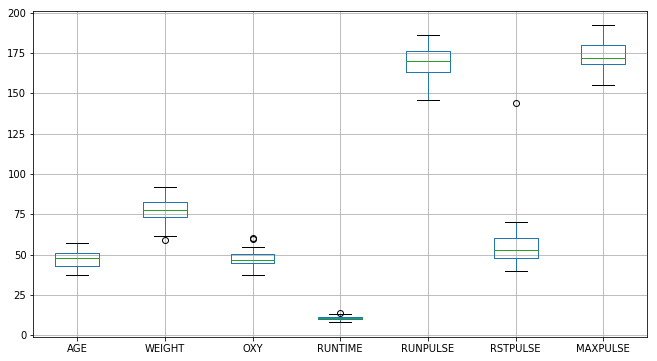

In [37]:
fitness.boxplot(figsize =(11,6))
plt.show()

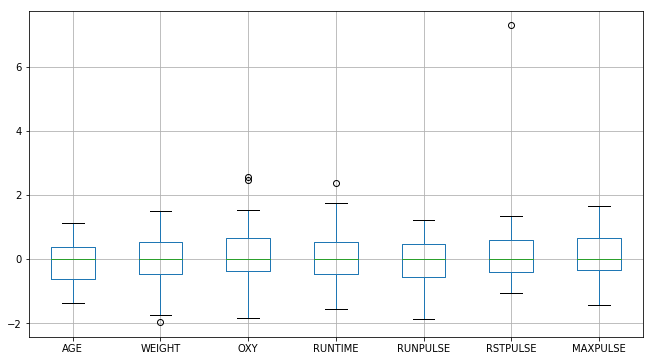

In [46]:
ds_robust_scale.boxplot(figsize =(11,6))
plt.show()

In [55]:
fitness.corr()['OXY'].sort_values().sort_values(ascending=False)

OXY         1.000000
WEIGHT     -0.159042
MAXPULSE   -0.236740
AGE        -0.249929
RUNPULSE   -0.397974
RSTPULSE   -0.457676
RUNTIME    -0.862195
Name: OXY, dtype: float64

In [59]:
object_cols = list(fit_char.columns)

In [60]:
object_cols.remove("NAME")

In [61]:
fitness_dummies = pd.get_dummies(fitness, columns=object_cols, prefix=object_cols).reset_index(drop=True)

In [62]:
fitness_dummies.head()

,NAME,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE,GENDER_남성,GENDER_여성,AGEGROUP_30대,AGEGROUP_40대,AGEGROUP_50대
0,Donna,42,68.150,59.571,8.17,166,40,172,0,1,0,1,0
1,Gracie,38,81.870,60.055,8.63,170,48,186,0,1,1,0,0
2,Luanne,43,85.840,54.297,8.65,156,45,168,0,1,0,1,0
3,Mimi,50,70.870,54.625,8.92,146,48,155,0,1,0,0,1
4,Chris,49,82.433,49.156,8.95,180,44,185,1,0,0,1,0
